In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ielts-success-stories-dataset/IELTS_Success_Stories_Dataset.xlsx



<div style="background-color: green; padding: 20px;">
import libraries
</div>

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [3]:
df=pd.read_excel('/kaggle/input/ielts-success-stories-dataset/IELTS_Success_Stories_Dataset.xlsx')
df.head()

,Candidate,Location,Profession,Study Duration (months),IELTS Score (Overall),Key Strategies,Education Level,Age,Target Country,English Proficiency (Preparation),...,Preferred Learning Resources,Application Status,Job Offer Received,Additional Certifications,Volunteer Experience,Language Fluency,Internship Experience,Relevant Skills,Recommendations,Networking Efforts
0,Aisha,Karachi,Grad Student,3,8.50,"Practice, forums, tutoring",Master's,24,Canada,Advanced,...,"Online courses, study guides",Under Process,No,TESOL,Yes,"Urdu, English",Research Assistant,"Data Analysis, Teaching",Strong,"LinkedIn, Local Events"
1,Ahmed,Lahore,IT Professional,4,7.50,"Balanced schedule, time management, speaking p...",Bachelor's,29,Australia,Intermediate,...,"Online forums, practice tests",Approved,Yes,PMP,No,"Urdu, English",IT Consultant,"Project Management, Programming",Positive,Online Communities
2,Fatima,Islamabad,School Teacher,2,9.00,"Intensive course, online resources, mock inter...",Master's,32,New Zealand,Advanced,...,"Study guides, language exchange",Under Process,No,CELTA,Yes,"Urdu, English",Curriculum Developer,"Lesson Planning, Educational Tech",Positive,Professional Groups
3,Ali,Peshawar,IT Professional,5,8.00,"Focused study, workshops, peer feedback",Bachelor's,27,USA,Advanced,...,"Mock exams, speaking clubs",Rejected,No,AWS Certified Solutions Architect,No,"Urdu, English",Software Developer,"Cloud Computing, Programming",Strong,Online Platforms
4,Saad,Lahore,Eng. Student,6,8.25,"Consistent practice, private tutor, speaking c...",Bachelor's,22,UK,Advanced,...,"Online tutorials, speaking practice",Under Process,No,IELTS Examiner,Yes,"Urdu, English",Research Assistant,"Lab Techniques, Data Analysis",Positive,University Events


<div style="background-color: green; padding: 20px;">
Data cleaning </div>

In [4]:

df.columns=df.columns.str.replace(' ',"_") # remove the white space with "_"
df.head()

,Candidate,Location,Profession,Study_Duration_(months),IELTS_Score_(Overall),Key_Strategies,Education_Level,Age,Target_Country,English_Proficiency_(Preparation),...,Preferred_Learning_Resources,Application_Status,Job_Offer_Received,Additional_Certifications,Volunteer_Experience,Language_Fluency,Internship_Experience,Relevant_Skills,Recommendations,Networking_Efforts
0,Aisha,Karachi,Grad Student,3,8.50,"Practice, forums, tutoring",Master's,24,Canada,Advanced,...,"Online courses, study guides",Under Process,No,TESOL,Yes,"Urdu, English",Research Assistant,"Data Analysis, Teaching",Strong,"LinkedIn, Local Events"
1,Ahmed,Lahore,IT Professional,4,7.50,"Balanced schedule, time management, speaking p...",Bachelor's,29,Australia,Intermediate,...,"Online forums, practice tests",Approved,Yes,PMP,No,"Urdu, English",IT Consultant,"Project Management, Programming",Positive,Online Communities
2,Fatima,Islamabad,School Teacher,2,9.00,"Intensive course, online resources, mock inter...",Master's,32,New Zealand,Advanced,...,"Study guides, language exchange",Under Process,No,CELTA,Yes,"Urdu, English",Curriculum Developer,"Lesson Planning, Educational Tech",Positive,Professional Groups
3,Ali,Peshawar,IT Professional,5,8.00,"Focused study, workshops, peer feedback",Bachelor's,27,USA,Advanced,...,"Mock exams, speaking clubs",Rejected,No,AWS Certified Solutions Architect,No,"Urdu, English",Software Developer,"Cloud Computing, Programming",Strong,Online Platforms
4,Saad,Lahore,Eng. Student,6,8.25,"Consistent practice, private tutor, speaking c...",Bachelor's,22,UK,Advanced,...,"Online tutorials, speaking practice",Under Process,No,IELTS Examiner,Yes,"Urdu, English",Research Assistant,"Lab Techniques, Data Analysis",Positive,University Events


In [5]:
# rename columns 
df.rename(columns={'Study_Duration_(months)': 'Study_Duration','IELTS_Score_(Overall)':'IELTS_Score','English_Proficiency_(Preparation)':'English_Proficiency'}, inplace=True)
df.head()

,Candidate,Location,Profession,Study_Duration,IELTS_Score,Key_Strategies,Education_Level,Age,Target_Country,English_Proficiency,...,Preferred_Learning_Resources,Application_Status,Job_Offer_Received,Additional_Certifications,Volunteer_Experience,Language_Fluency,Internship_Experience,Relevant_Skills,Recommendations,Networking_Efforts
0,Aisha,Karachi,Grad Student,3,8.50,"Practice, forums, tutoring",Master's,24,Canada,Advanced,...,"Online courses, study guides",Under Process,No,TESOL,Yes,"Urdu, English",Research Assistant,"Data Analysis, Teaching",Strong,"LinkedIn, Local Events"
1,Ahmed,Lahore,IT Professional,4,7.50,"Balanced schedule, time management, speaking p...",Bachelor's,29,Australia,Intermediate,...,"Online forums, practice tests",Approved,Yes,PMP,No,"Urdu, English",IT Consultant,"Project Management, Programming",Positive,Online Communities
2,Fatima,Islamabad,School Teacher,2,9.00,"Intensive course, online resources, mock inter...",Master's,32,New Zealand,Advanced,...,"Study guides, language exchange",Under Process,No,CELTA,Yes,"Urdu, English",Curriculum Developer,"Lesson Planning, Educational Tech",Positive,Professional Groups
3,Ali,Peshawar,IT Professional,5,8.00,"Focused study, workshops, peer feedback",Bachelor's,27,USA,Advanced,...,"Mock exams, speaking clubs",Rejected,No,AWS Certified Solutions Architect,No,"Urdu, English",Software Developer,"Cloud Computing, Programming",Strong,Online Platforms
4,Saad,Lahore,Eng. Student,6,8.25,"Consistent practice, private tutor, speaking c...",Bachelor's,22,UK,Advanced,...,"Online tutorials, speaking practice",Under Process,No,IELTS Examiner,Yes,"Urdu, English",Research Assistant,"Lab Techniques, Data Analysis",Positive,University Events


In [6]:
df.isnull().sum()

Candidate                       0
Location                        0
Profession                      0
Study_Duration                  0
IELTS_Score                     0
Key_Strategies                  0
Education_Level                 0
Age                             0
Target_Country                  0
English_Proficiency             0
Practice_Hours_per_Week         0
Mock_Tests_Taken                0
Achieved_Desired_Score          0
Preferred_Learning_Resources    0
Application_Status              0
Job_Offer_Received              0
Additional_Certifications       0
Volunteer_Experience            0
Language_Fluency                0
Internship_Experience           0
Relevant_Skills                 0
Recommendations                 0
Networking_Efforts              0
dtype: int64

In [7]:
df.duplicated().sum()

11

In [8]:
df.drop_duplicates(inplace=True)

<div style="background-color: green; padding: 20px;">
check the destribution  of numerical column in the data set
</div>

Text(0.5, 0.98, 'Histograms of Column Distributions')

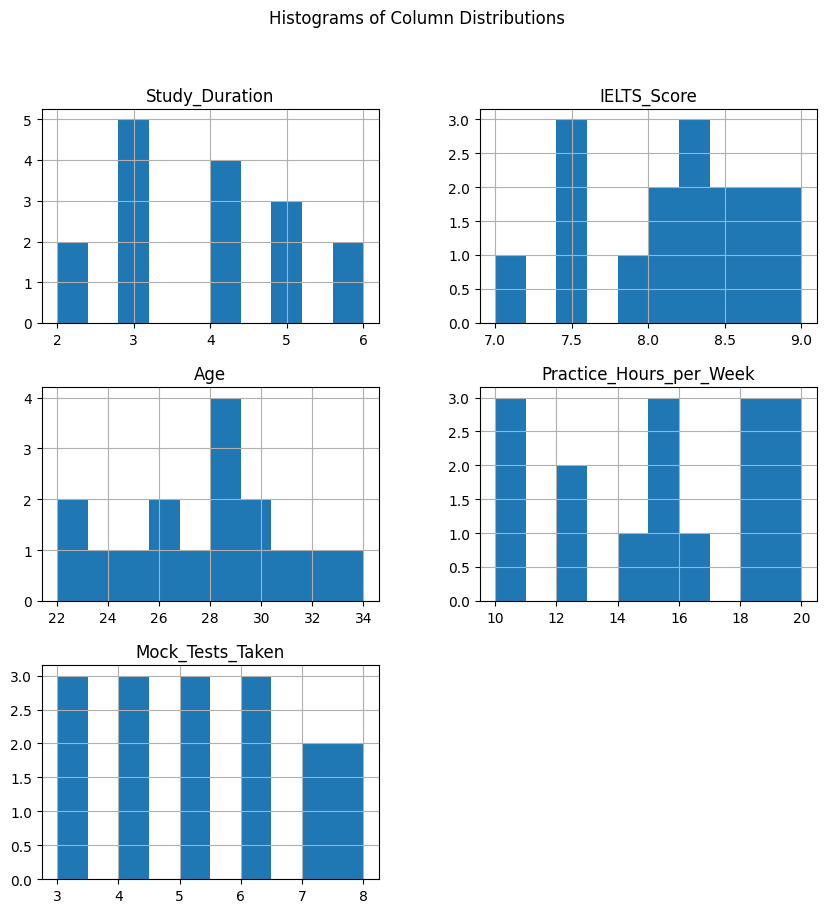

In [9]:
df.hist(figsize=(10, 10))  
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.suptitle("Histograms of Column Distributions")



<div style="background-color: green; padding: 20px;">
relation between study duration  and score </div>

<Axes: xlabel='Study_Duration', ylabel='IELTS_Score'>

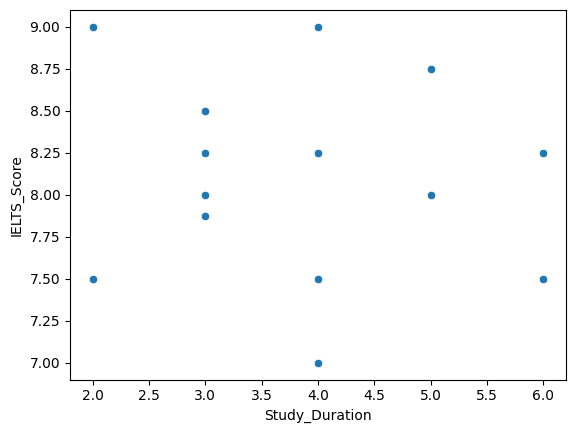

In [10]:

sns.scatterplot(x=df['Study_Duration'], y=df['IELTS_Score'])


<div style="background-color: green; padding: 20px;">
relation between age and score </div>

<Axes: xlabel='Age', ylabel='IELTS_Score'>

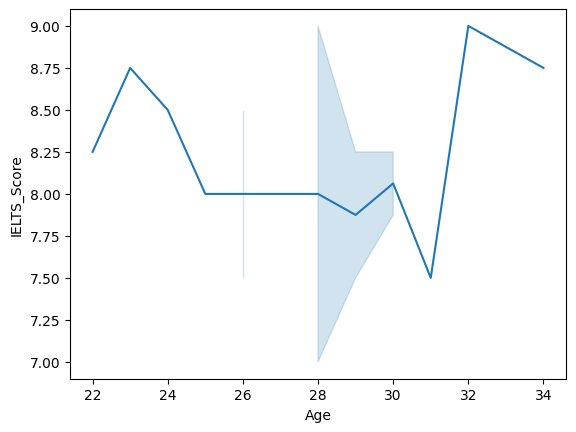

In [11]:
sns.lineplot(x=df["Age"], y=df['IELTS_Score'])



<div style="background-color: green; padding: 20px;">
which Profession has the highest score </div>

Text(0, 0.5, 'score')

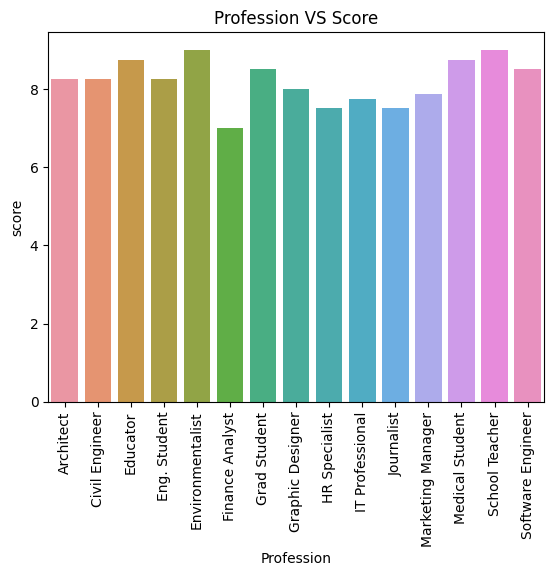

In [12]:
prof_score=df.groupby('Profession')['IELTS_Score'].mean()
sns.barplot(x=prof_score.index,y=prof_score.values)
plt.xticks(rotation =90);
plt.title ('Profession VS Score')
plt.ylabel('score')


<div style="background-color: green; padding: 20px;">
all Candiate scores </div>

Text(0, 0.5, 'score')

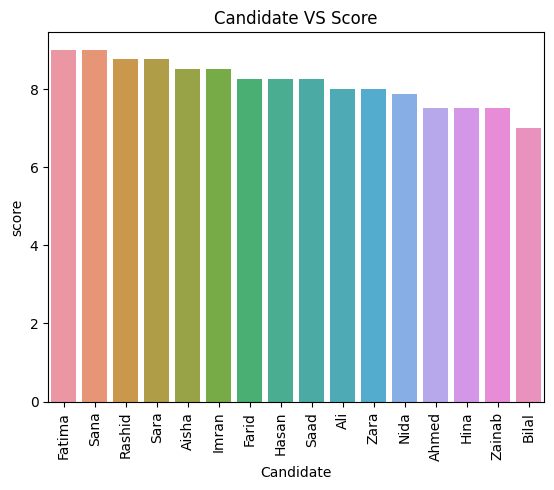

In [13]:
can_score=df.groupby('Candidate')['IELTS_Score'].max()
sns.barplot(x=can_score.sort_values(ascending=False).index,y=can_score.sort_values(ascending=False).values)
plt.xticks(rotation =90);
plt.title ('Candidate VS Score')
plt.ylabel('score')

<div style="background-color: green; padding: 20px;">
Education level between stundents  </div>

(-1.1, 1.1, -1.1, 1.1)

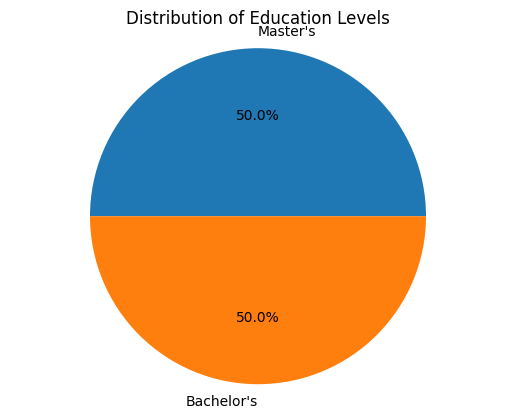

In [14]:
education_counts = df['Education_Level'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Education Levels')
plt.axis('equal')

<div style="background-color: green; padding: 20px;">
    Job_Offer_Received precentage among thes tudents
  </div>

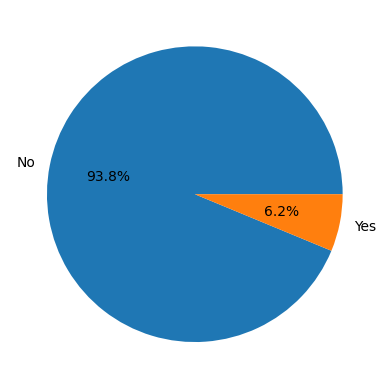

In [15]:
job_offer=df.Job_Offer_Received.value_counts()
plt.pie(job_offer,labels=job_offer.index, autopct='%1.1f%%');

<div style="background-color: green; padding: 20px;">
what is the most targeted country student tend to travel  </div>

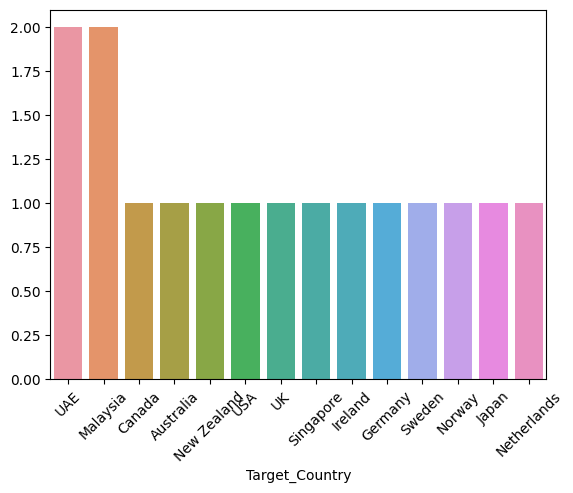

In [16]:
Target_Country=df.Target_Country.value_counts()
sns.barplot(x=Target_Country.index,y=Target_Country.values)
plt.xticks(rotation=45);

<div style="background-color: green; padding: 20px;">
what is the  location  that has  students with the highest score   </div>

Location
Islamabad    9.00
Karachi      8.50
Lahore       8.75
Peshawar     9.00
Name: IELTS_Score, dtype: float64


Text(0.5, 1.0, 'location VS score')

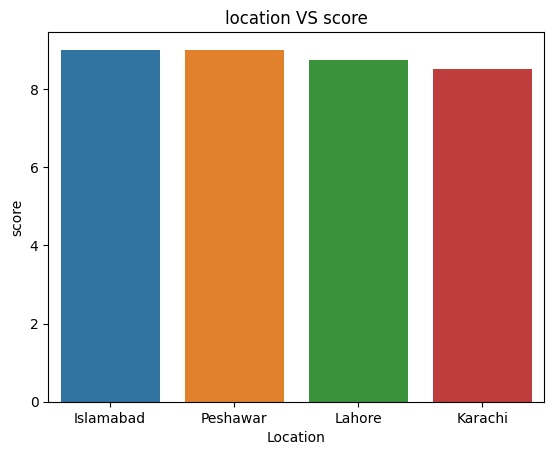

In [17]:
loc_score=df.groupby('Location')['IELTS_Score'].max()
sns.barplot(x=loc_score.sort_values(ascending=False).index,y=loc_score.sort_values(ascending=False).values)
print(loc_score)
plt.ylabel('score')
plt.title("location VS score")

In [18]:
df.head()

,Candidate,Location,Profession,Study_Duration,IELTS_Score,Key_Strategies,Education_Level,Age,Target_Country,English_Proficiency,...,Preferred_Learning_Resources,Application_Status,Job_Offer_Received,Additional_Certifications,Volunteer_Experience,Language_Fluency,Internship_Experience,Relevant_Skills,Recommendations,Networking_Efforts
0,Aisha,Karachi,Grad Student,3,8.50,"Practice, forums, tutoring",Master's,24,Canada,Advanced,...,"Online courses, study guides",Under Process,No,TESOL,Yes,"Urdu, English",Research Assistant,"Data Analysis, Teaching",Strong,"LinkedIn, Local Events"
1,Ahmed,Lahore,IT Professional,4,7.50,"Balanced schedule, time management, speaking p...",Bachelor's,29,Australia,Intermediate,...,"Online forums, practice tests",Approved,Yes,PMP,No,"Urdu, English",IT Consultant,"Project Management, Programming",Positive,Online Communities
2,Fatima,Islamabad,School Teacher,2,9.00,"Intensive course, online resources, mock inter...",Master's,32,New Zealand,Advanced,...,"Study guides, language exchange",Under Process,No,CELTA,Yes,"Urdu, English",Curriculum Developer,"Lesson Planning, Educational Tech",Positive,Professional Groups
3,Ali,Peshawar,IT Professional,5,8.00,"Focused study, workshops, peer feedback",Bachelor's,27,USA,Advanced,...,"Mock exams, speaking clubs",Rejected,No,AWS Certified Solutions Architect,No,"Urdu, English",Software Developer,"Cloud Computing, Programming",Strong,Online Platforms
4,Saad,Lahore,Eng. Student,6,8.25,"Consistent practice, private tutor, speaking c...",Bachelor's,22,UK,Advanced,...,"Online tutorials, speaking practice",Under Process,No,IELTS Examiner,Yes,"Urdu, English",Research Assistant,"Lab Techniques, Data Analysis",Positive,University Events


<div style="background-color: green; padding: 20px;">
what is the most English Proficiency level  among the Candidate </div>

English_Proficiency
Advanced        11
Intermediate     5
Name: count, dtype: int64


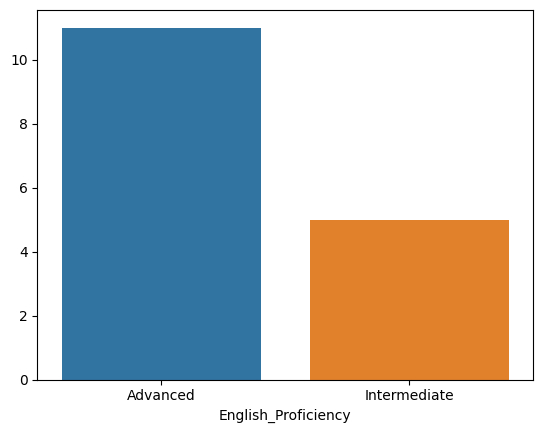

In [19]:
engl_count=df.English_Proficiency.value_counts()
sns.barplot(x=engl_count.index,y=engl_count.values)

print(engl_count)